In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/raw/medical_insurance.csv")

# Show first 5 rows
print("First 5 rows:")
print(df.head())

# Show shape of data
print("\nDataset shape:", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Get unique values in categorical columns
print("\nUnique values in 'sex':", df['sex'].unique())
print("Unique values in 'smoker':", df['smoker'].unique())
print("Unique values in 'region':", df['region'].unique())

# Basic statistics for numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset shape: (2772, 7)

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Number of duplicate rows: 1435

Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']

Statistical summary of numerical columns:
               age          bmi    

In [5]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set up styling for plots (makes them look nicer)
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-darkgrid") # Or just 'default' if the seaborn style doesn't load

# Display plots inline in the notebook
%matplotlib inline

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None

--- Distribution of Insurance Charges ---
count     2772.000000
mean     13261.369959
std      12151.768945
min       1121.873900
25%       4687.797000
50%       9333.014350
75%      16577.779500
max      63770.428010
Name: charges, dtype: float64


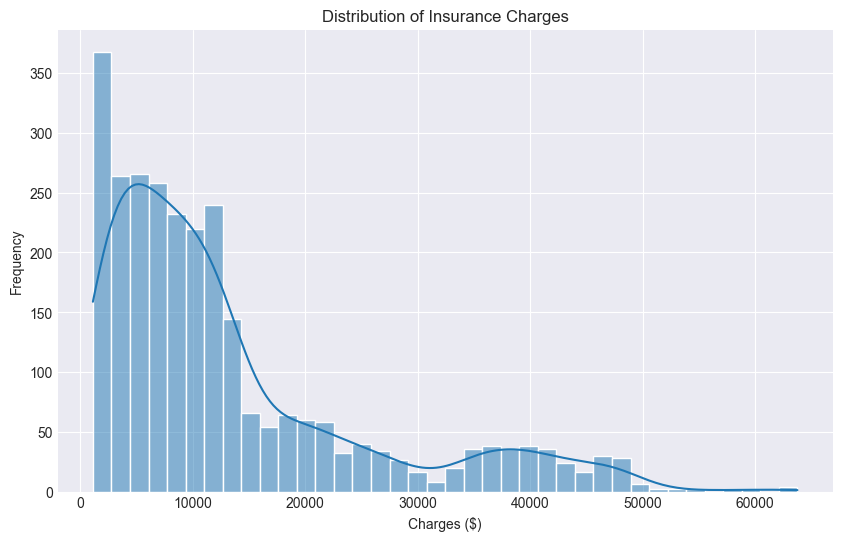

In [6]:
# Display basic information about the dataset again for reference
print("Dataset Info:")
print(df.info())

# Show the distribution of the target variable 'charges'
print("\n--- Distribution of Insurance Charges ---")
print(df['charges'].describe())

# Plot a histogram of 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()

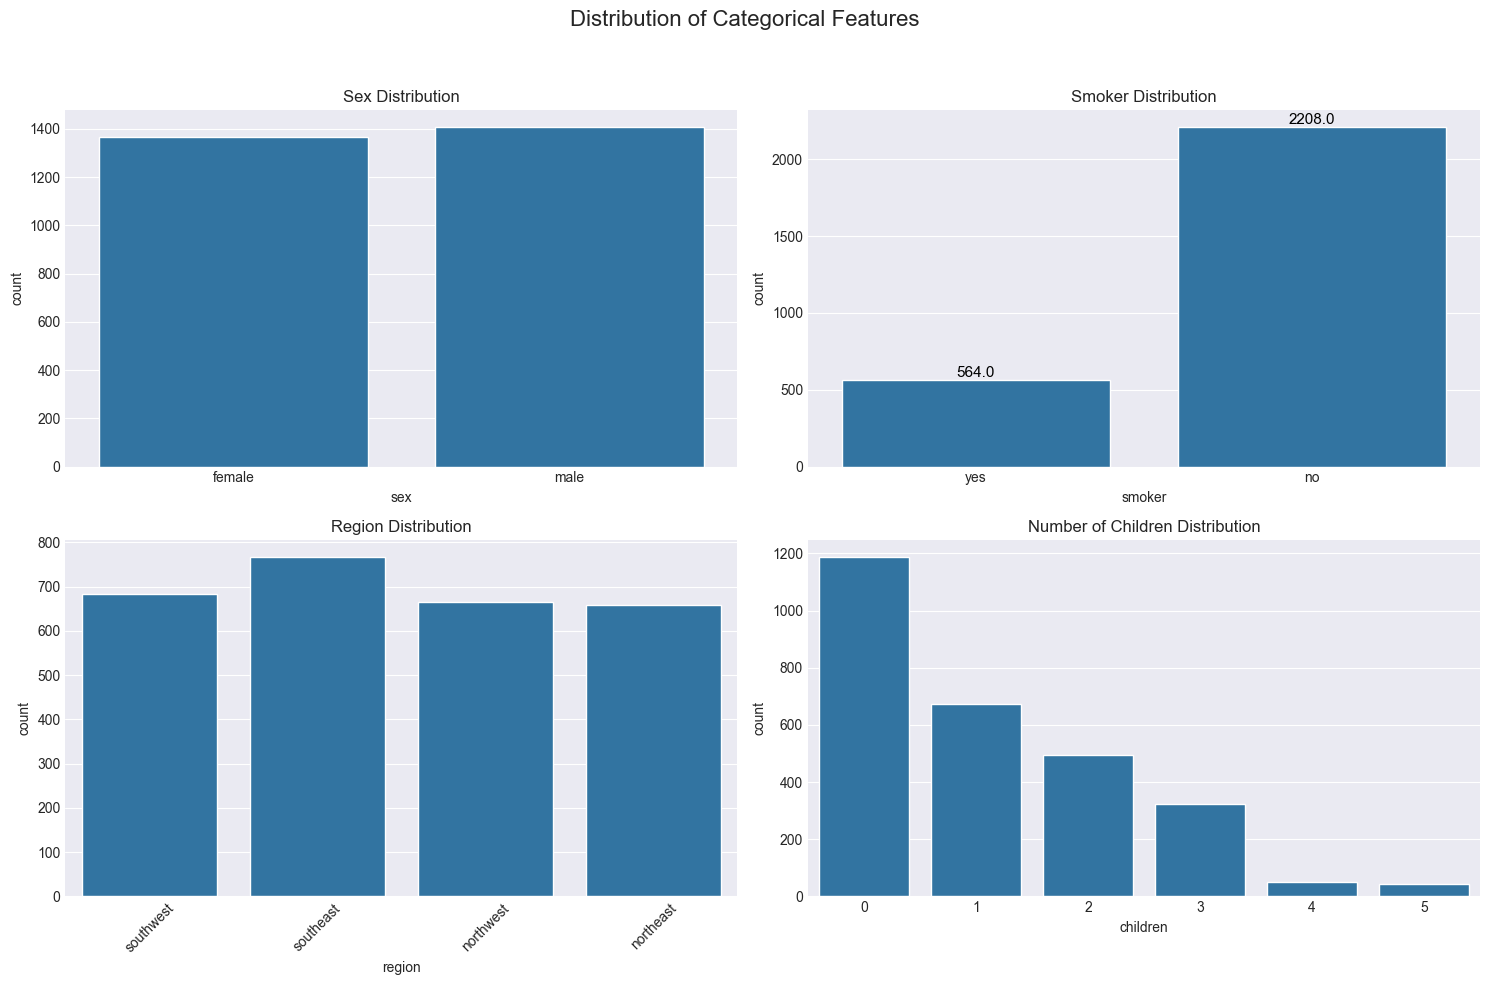

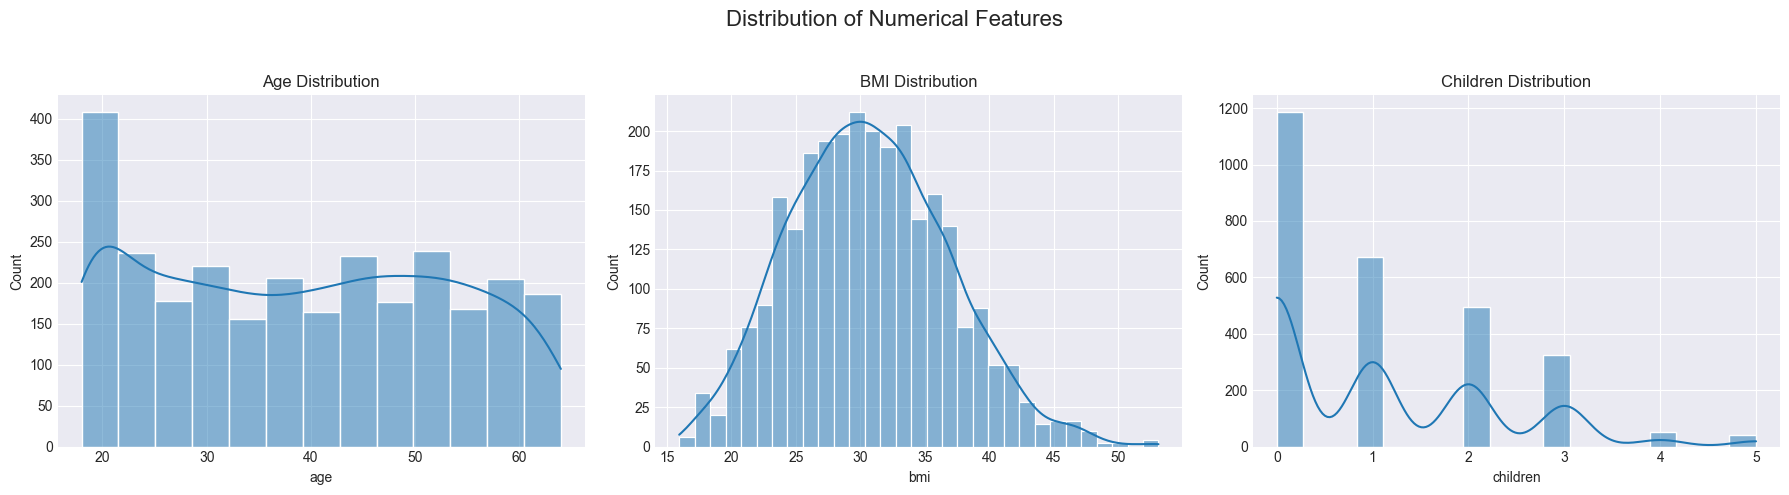

In [7]:
# --- Univariate Analysis ---

# 1. Distribution of Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

sns.countplot(data=df, x='sex', ax=axes[0, 0])
axes[0, 0].set_title('Sex Distribution')

sns.countplot(data=df, x='smoker', ax=axes[0, 1])
axes[0, 1].set_title('Smoker Distribution')

sns.countplot(data=df, x='region', ax=axes[1, 0])
axes[1, 0].set_title('Region Distribution')
axes[1, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels for region

# Add count labels on bars for 'smoker' plot (as it's often the most insightful)
ax = axes[0, 1]
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# For 'children', a countplot is also good
sns.countplot(data=df, x='children', ax=axes[1, 1])
axes[1, 1].set_title('Number of Children Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()

# 2. Distribution of Numerical Features (Histograms)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

sns.histplot(data=df, x='age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data=df, x='bmi', kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

sns.histplot(data=df, x='children', kde=True, ax=axes[2])
axes[2].set_title('Children Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Bivariate Analysis

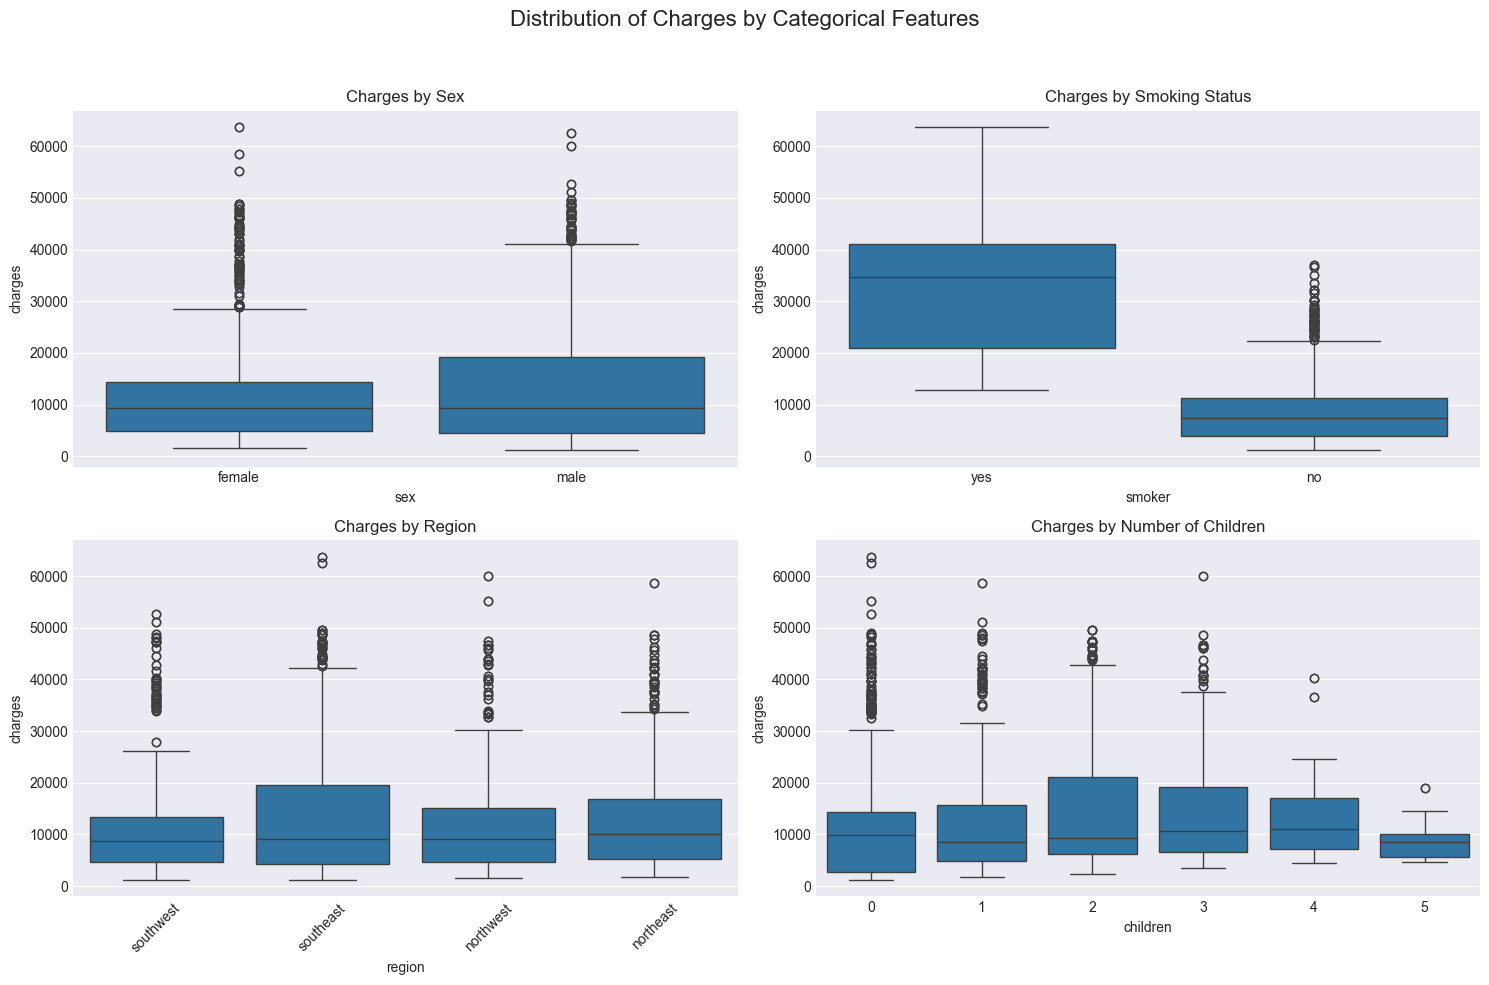

In [8]:
# --- Bivariate Analysis: Categorical Features vs Charges ---

# 1. Boxplots for Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Charges by Categorical Features', fontsize=16)

sns.boxplot(data=df, x='sex', y='charges', ax=axes[0, 0])
axes[0, 0].set_title('Charges by Sex')

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0, 1])
axes[0, 1].set_title('Charges by Smoking Status')

sns.boxplot(data=df, x='region', y='charges', ax=axes[1, 0])
axes[1, 0].set_title('Charges by Region')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='children', y='charges', ax=axes[1, 1])
axes[1, 1].set_title('Charges by Number of Children')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

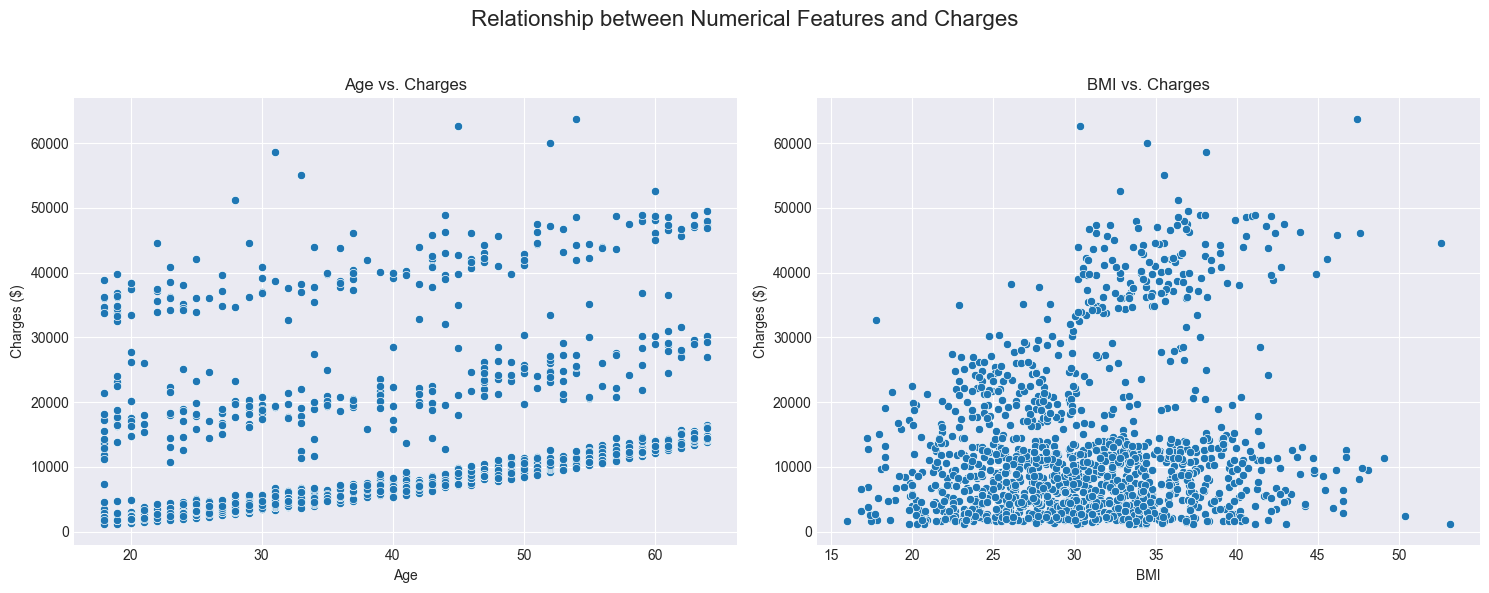

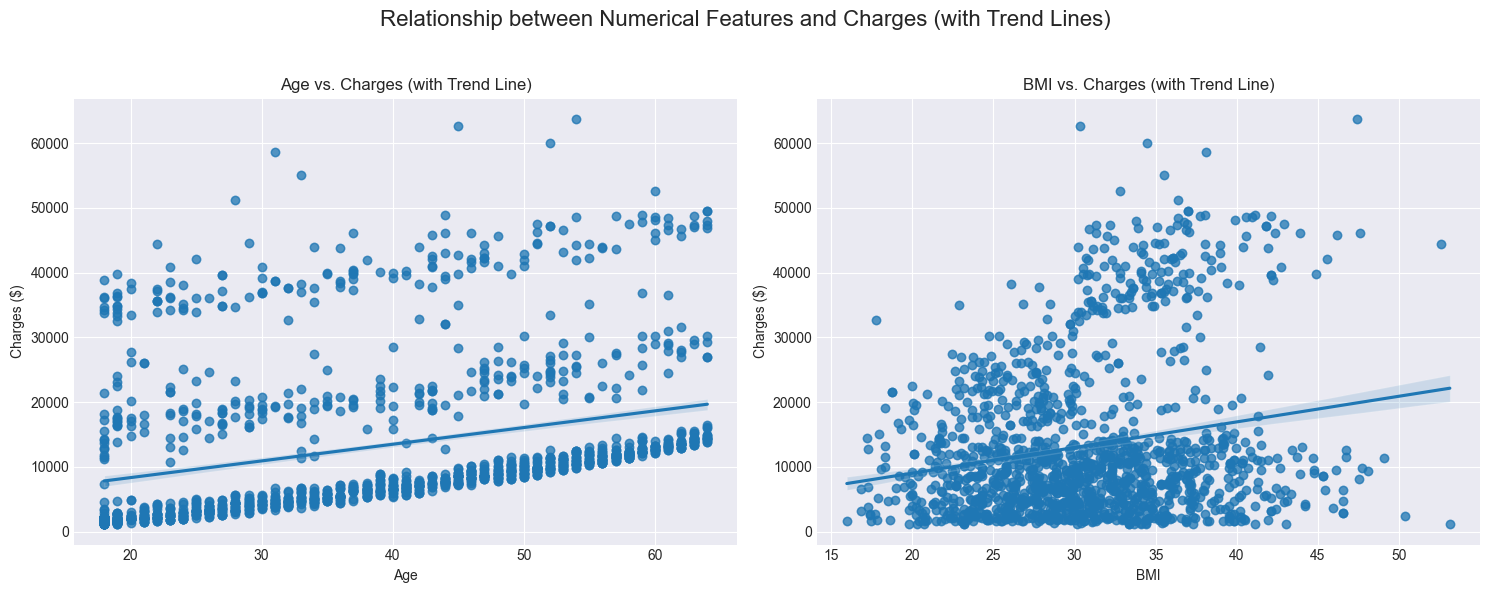

In [9]:
# --- Bivariate Analysis: Numerical Features vs Charges ---

# 1. Scatter plots for Numerical Features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relationship between Numerical Features and Charges', fontsize=16)

# Scatter plot: Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', ax=axes[0])
axes[0].set_title('Age vs. Charges')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges ($)')

# Scatter plot: BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', ax=axes[1])
axes[1].set_title('BMI vs. Charges')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges ($)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Scatter plots with trend lines (regression plots)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relationship between Numerical Features and Charges (with Trend Lines)', fontsize=16)

# Regression plot: Age vs Charges
sns.regplot(data=df, x='age', y='charges', ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title('Age vs. Charges (with Trend Line)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges ($)')

# Regression plot: BMI vs Charges
sns.regplot(data=df, x='bmi', y='charges', ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title('BMI vs. Charges (with Trend Line)')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges ($)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Correlation Matrix (Numerical Features Only):
               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


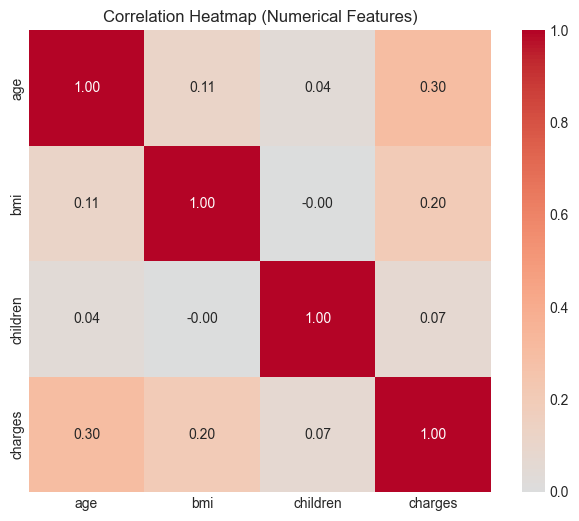

In [11]:
# --- Correlation Analysis (for Numerical Features Only) ---

# 1. Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# 2. Compute the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# 3. Display the correlation matrix
print("Correlation Matrix (Numerical Features Only):")
print(correlation_matrix)

# 4. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

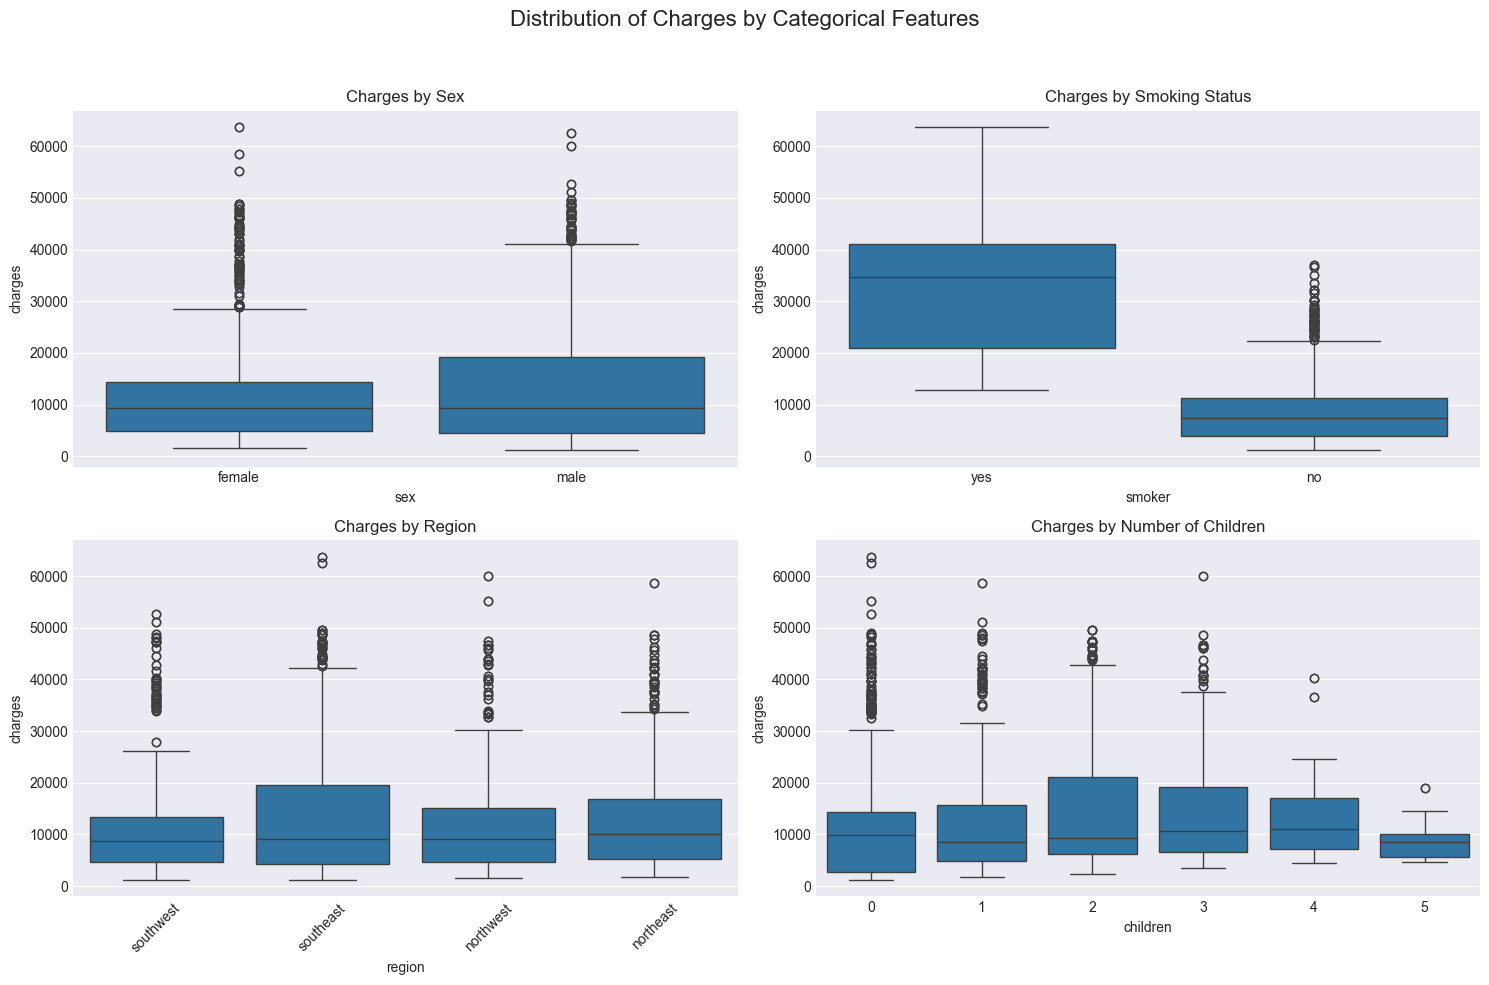

In [12]:
# --- Bivariate Analysis: Categorical Features vs Charges ---

# 1. Boxplots for Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Charges by Categorical Features', fontsize=16)

sns.boxplot(data=df, x='sex', y='charges', ax=axes[0, 0])
axes[0, 0].set_title('Charges by Sex')

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0, 1])
axes[0, 1].set_title('Charges by Smoking Status')

sns.boxplot(data=df, x='region', y='charges', ax=axes[1, 0])
axes[1, 0].set_title('Charges by Region')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='children', y='charges', ax=axes[1, 1])
axes[1, 1].set_title('Charges by Number of Children')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

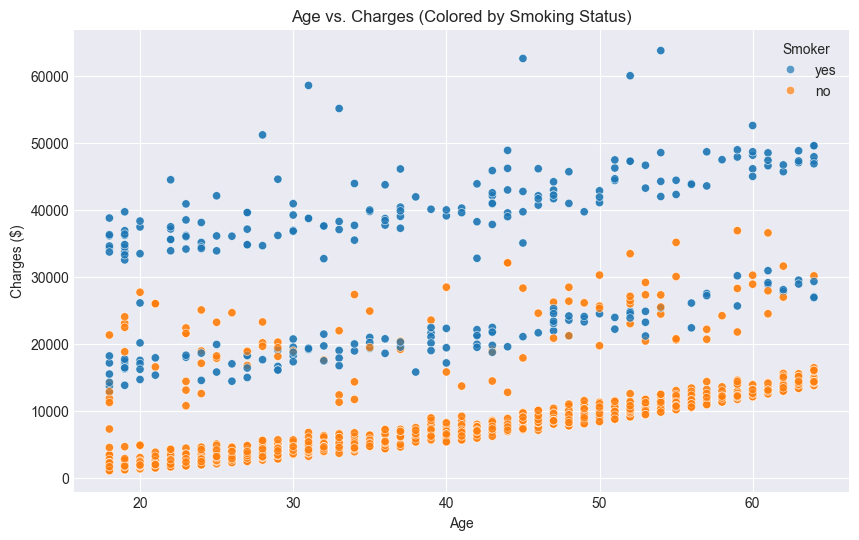

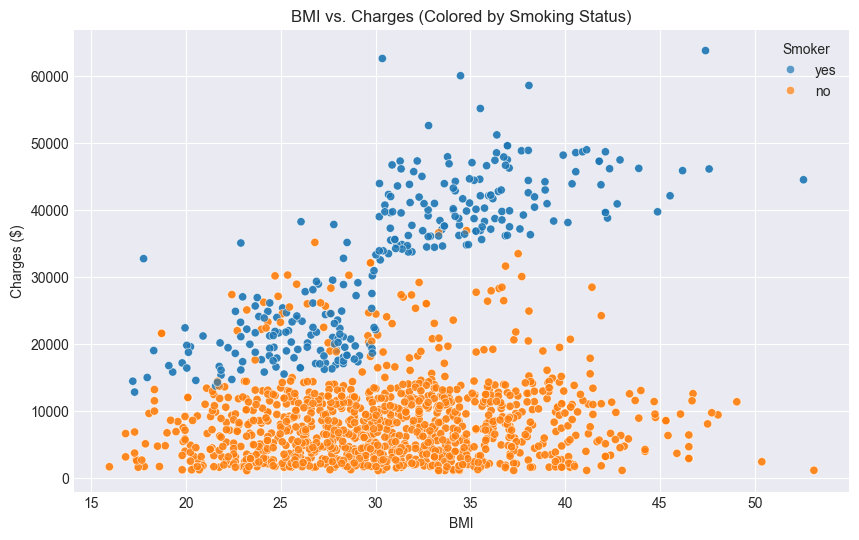

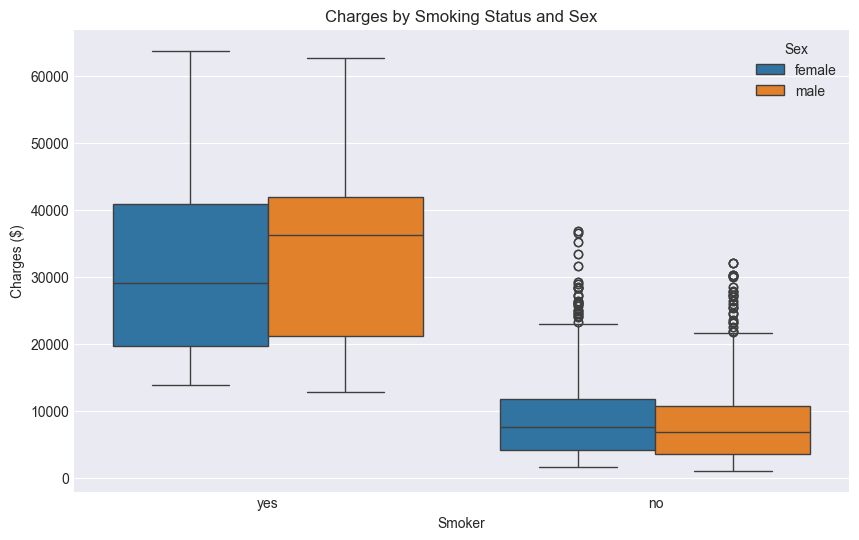

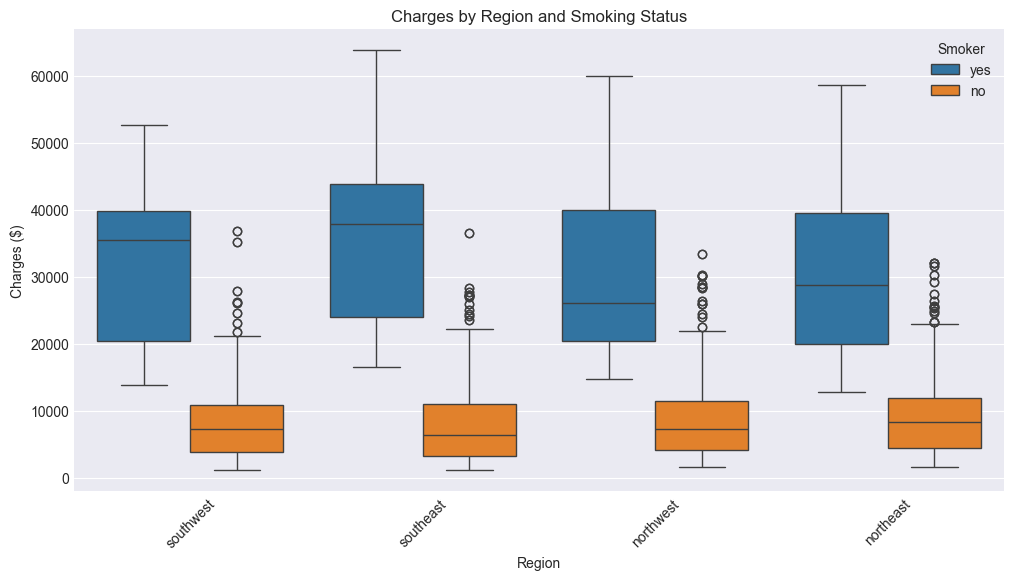

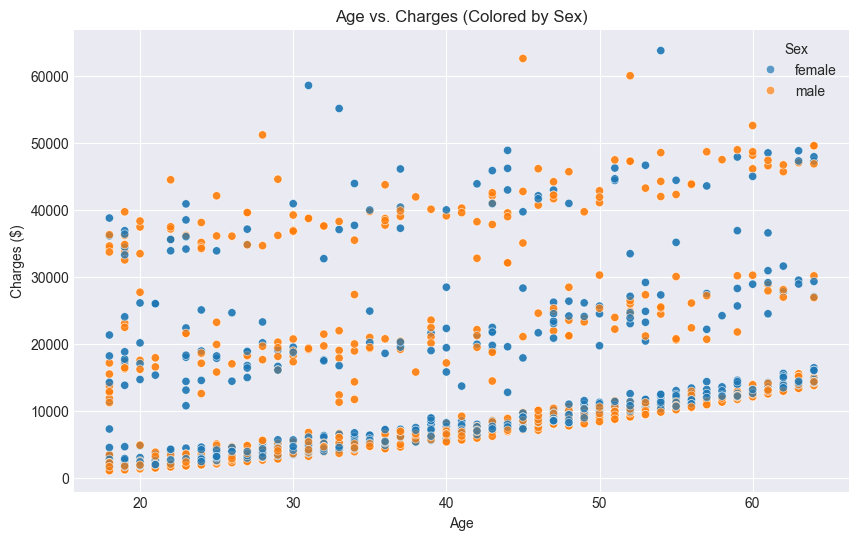

In [13]:
# --- Multivariate Analysis ---

# 1. Scatter plot: Age vs Charges, colored by Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Age vs. Charges (Colored by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker')
plt.show()

# 2. Scatter plot: BMI vs Charges, colored by Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('BMI vs. Charges (Colored by Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker')
plt.show()

# 3. Boxplot: Charges by Smoker and Sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges', hue='sex')
plt.title('Charges by Smoking Status and Sex')
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.legend(title='Sex')
plt.show()

# 4. Boxplot: Charges by Region and Smoker
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.title('Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.xticks(rotation=45)
plt.legend(title='Smoker')
plt.show()

# 5. Scatter plot: Age vs Charges, colored by Sex
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='sex', alpha=0.7)
plt.title('Age vs. Charges (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend(title='Sex')
plt.show()

### --- Feature Engineering and Data Preprocessing ---

In [14]:
# --- Feature Engineering and Data Preprocessing ---

# 1. Create a copy of the original dataframe for preprocessing
df_processed = df.copy()

# 2. Encode categorical variables using One-Hot Encoding
# This creates binary columns for each category
df_encoded = pd.get_dummies(df_processed, columns=['sex', 'smoker', 'region'], drop_first=True)

# 3. Display the first few rows to see the new columns
print("First 5 rows after One-Hot Encoding:")
print(df_encoded.head())

# 4. Display the new column names
print("\nColumn names after encoding:")
print(df_encoded.columns.tolist())

# 5. Create interaction features based on our EDA findings
# Age * Smoker interaction (as smoking significantly affects how age impacts charges)
df_encoded['age_smoker'] = df_encoded['age'] * df_encoded['smoker_yes']

# BMI * Smoker interaction (as smoking significantly affects how BMI impacts charges)
df_encoded['bmi_smoker'] = df_encoded['bmi'] * df_encoded['smoker_yes']

# Age * BMI interaction
df_encoded['age_bmi'] = df_encoded['age'] * df_encoded['bmi']

# 6. Display info about the final processed dataset
print("\nFinal dataset info:")
print(df_encoded.info())

# 7. Show the first few rows of the final dataset
print("\nFirst 5 rows of final processed dataset:")
print(df_encoded.head())

# 8. Save the processed dataset for use in modeling
# Make sure the 'processed' folder exists in your 'data' directory
df_encoded.to_csv("../data/processed/medical_insurance_processed.csv", index=False)
print("\nProcessed dataset saved to '../data/processed/medical_insurance_processed.csv'")

First 5 rows after One-Hot Encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Column names after encoding:
['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entrie